---------------------------------------------------------------------------------------------------------------------------
This tutorial relies on the example model provided by `wasar`, which is built from real public datasets belonging to a small area near the Doñana National Park (southern Spain). The model can be accessed directly through  `wasar.example.get_model()` and the relative paths to the data, through `wasar.example.get_path()`.
For more information about the data sources, see the file *Data Sources.txt*, located in the same folder as this tutorial.

Fore **more information** about the use of any function, method, class o moduel, use `help` bult-in (or `?`) to acces its documentation:

`>>> help(wasar.parts)` or press the **tabulator** key in Jupyter Notebook to access an object's methods.

---------------------------------------------------------------------------------------------------------------------------

<h1><center>Studying an Aggregate</center></h1>

As explained in the tutorial *Creating a wasar Model*, the model contains a layer with aggregates, which represent the areas where the ground deformation will be analyzed in combination with other variables. The study of each of them is done through the `aggregate` function, which requires indicating the aggregate in question to be studied and, optionally, if you want to handle only the vertical component of the ground motion (`vm=True`) or the whole deformation (according to the LOS direction: Line Of Sigh) in the DInSAR datasets

In the following example the aggregate *2* is analyzed, creating an object of type `Agregado` with information related to the extent it covers.

In [1]:
import wasar

Doñana = wasar.example.get_model()

A2 = Doñana.agregado('2', vm=True)

Geometría añadida correctamente.
Geometría añadida correctamente.


## Sensors linkage

If the model contains a piezometric and precipitation database with spatial information, the definition of an aggregate implies the **automatic linking** to it of the nearest piezometer and rainfall station. Nevertheless, these sensors can be modified through the `set_piezometer` and `set_station` methods, as well as adding another one from another database through `set_other_bd`. These functions allow linking a sensor to the aggregate in **three possible ways**:

**1.** Linking the **nearest** sensor. Way = `nearest`.

**2.** Linking the nearest sensors in a **radius** (`radius`, in Km) around (way=`radius`). Available for databases of type `Piezometria` and `DataBase`.

**3.** **Manual** linkage of the sensor. Way = `manual`.

In the case of rainfall stations, the associated values correspond to the **cumulative sum of deviations** respect the mean value of the series. This can be chosen through the `values` argument.

Since these methods return the object itself, they can be chained together in the same line of code.

In [2]:
A2.set_piezo(way='nearest').set_estacion(way='manual', estacion='Almonte')

1 piezo(s) fijado(s) según el método 'nearest'.
Fijada la estación: Almonte según el método 'manual'.


Linked **time series** of piezometry, precipitation or other databases can be accessed through the `piezos`, `station` and `other_sensors` methods, respectively.

## Aggregate visualization

All this information linked to the aggregate as well as the deformation curves of the aggregate datasets can be **visualized** through the `plot` method. The **spatial representation** of all entities of the aggregate can be performed through the `map` method.

<AxesSubplot:title={'center':'Agregado 2'}, ylabel='Deformación (cm)'>

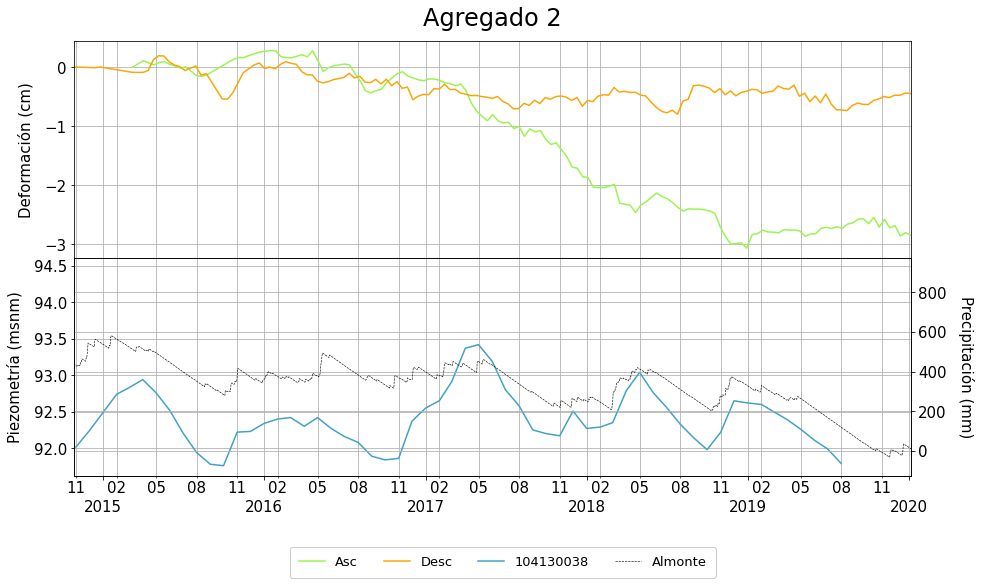

In [3]:
A2.plot()

In [4]:
A2.mapa()

## Other `Aggregate` object methods

This object also contains other methods that allow to know, among others, the **datasets** contained in the aggregate (`datasets`), the **area** it covers (in *ha*; `area`), the coordinates of its centroid (`centroid`) or if the deformation values are the original ones (according to the LOS direction) or if they correspond only to the **vertical component** (`vm`). In addition, all information can be printed on the screen using the `info` method.

Among the aggregate functionalities, `subset` and `wavelet` functions stand out. The first one allows to access one of the datasets present in the aggregate, returning a copy of the `Dataset` of the model, but with its information trimmed to the extension of the aggregate. This operation is better explained in the tutorial *Working with model parts*.

### Wavelet tools

The second function (`wavelet`) provides a spectral analysis of the model variables using wavelet tools.
Since this function is executed with the R package [WaveletComp](http://www.hs-stat.com/projects/WaveletComp/WaveletComp_guided_tour.pdf), the `rpy2` package must be installed, as well as the *R* programming language, although the latter is usually installed with the installation of the first rpy2.


Since the analysis requires the time series to be studied to have a regular sampling interval and a given frequency, the first argument of this function is the **sampling frequency**, entered as a string according to the [specifications](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects) of the `pandas` library.

The next argument of this function is the name of the time series to be analyzed. If only one is entered, the **Continous Wavelet Transform** (CWT) will be performed, while if two are entered the **Cross Wavelet Transform** (XWT) and the **Wavelet Transform Coherence** (WTC) will be performed. You can find a good explanation of these transforms, as well as the case study of the Tertiary and Detritic Aquifer of Madrid (TDAM) in [this link](http://rua.ua.es/dspace/handle/10045/106009).

The aggregate variable to be introduced can be indicated by following the map below:

- Name of some datasets: check `A2.datasets`

- `'piezo'`: analyze A2 piezometer.

- `'precipi'`: analyze A2 rainfall station.

- `'other_sensors'`: analyze a sensor from other database.

You can also enter a `pandas Series` or `DataFrame` for the analysis of an external time series.

When entering two time series, the **order** of their entry is important for the identification of cause-effect relationships.

In the `**kwargs` of the function, the variables involved must be defined. A correct analysis requires a conscious configuration of these starting parameters. It is highly recommended to first consult the [available options](https://cran.r-project.org/web/packages/WaveletComp/WaveletComp.pdf) and their functionalities.

This analysis is illustrated below with **two examples**:

#### **1.** Study of the main periodicities of the dataset 'Asc' of aggregate 2, for a monthly frequency.

Smoothing the time series...
Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 


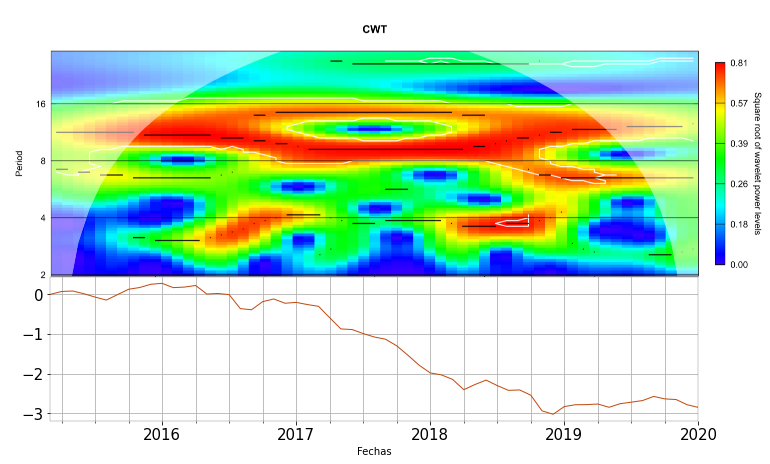

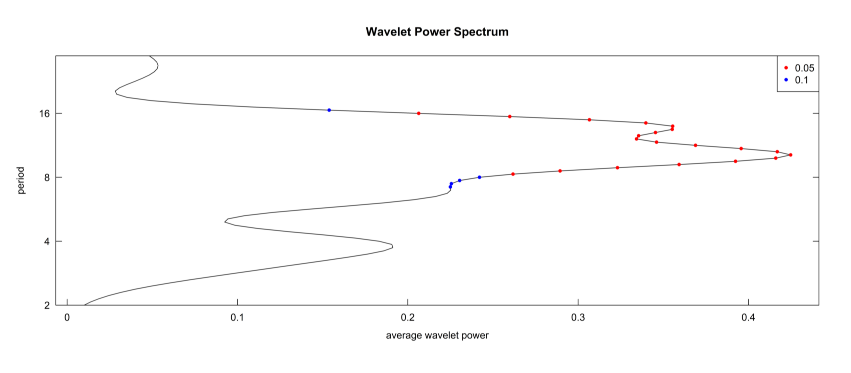

In [5]:
W = A2.wavelet('M','Asc', dt=1, dj=1/20, lowerPeriod=2, upperPeriod=30)

#### **2.** Analysis of the common periodicities between the average deformation of aggregate 2 (for dataset 'Asc') and the piezometer linked to it, for a monthly sampling frequency.

Smoothing the time series...
Starting wavelet transformation and coherency computation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave.xy Angle sWave.xy sAngle Power.xy Power.xy.avg Power.xy.pval Power.xy.avg.pval Coherency Coherence Coherence.avg Coherence.pval Coherence.avg.pval Wave.x Wave.y Phase.x Phase.y Ampl.x Ampl.y Power.x Power.y Power.x.avg Power.y.avg Power.x.pval Power.y.pval Power.x.avg.pval Power.y.avg.pval sPower.x sPower.y Ridge.xy Ridge.co Ridge.x Ridge.y Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 


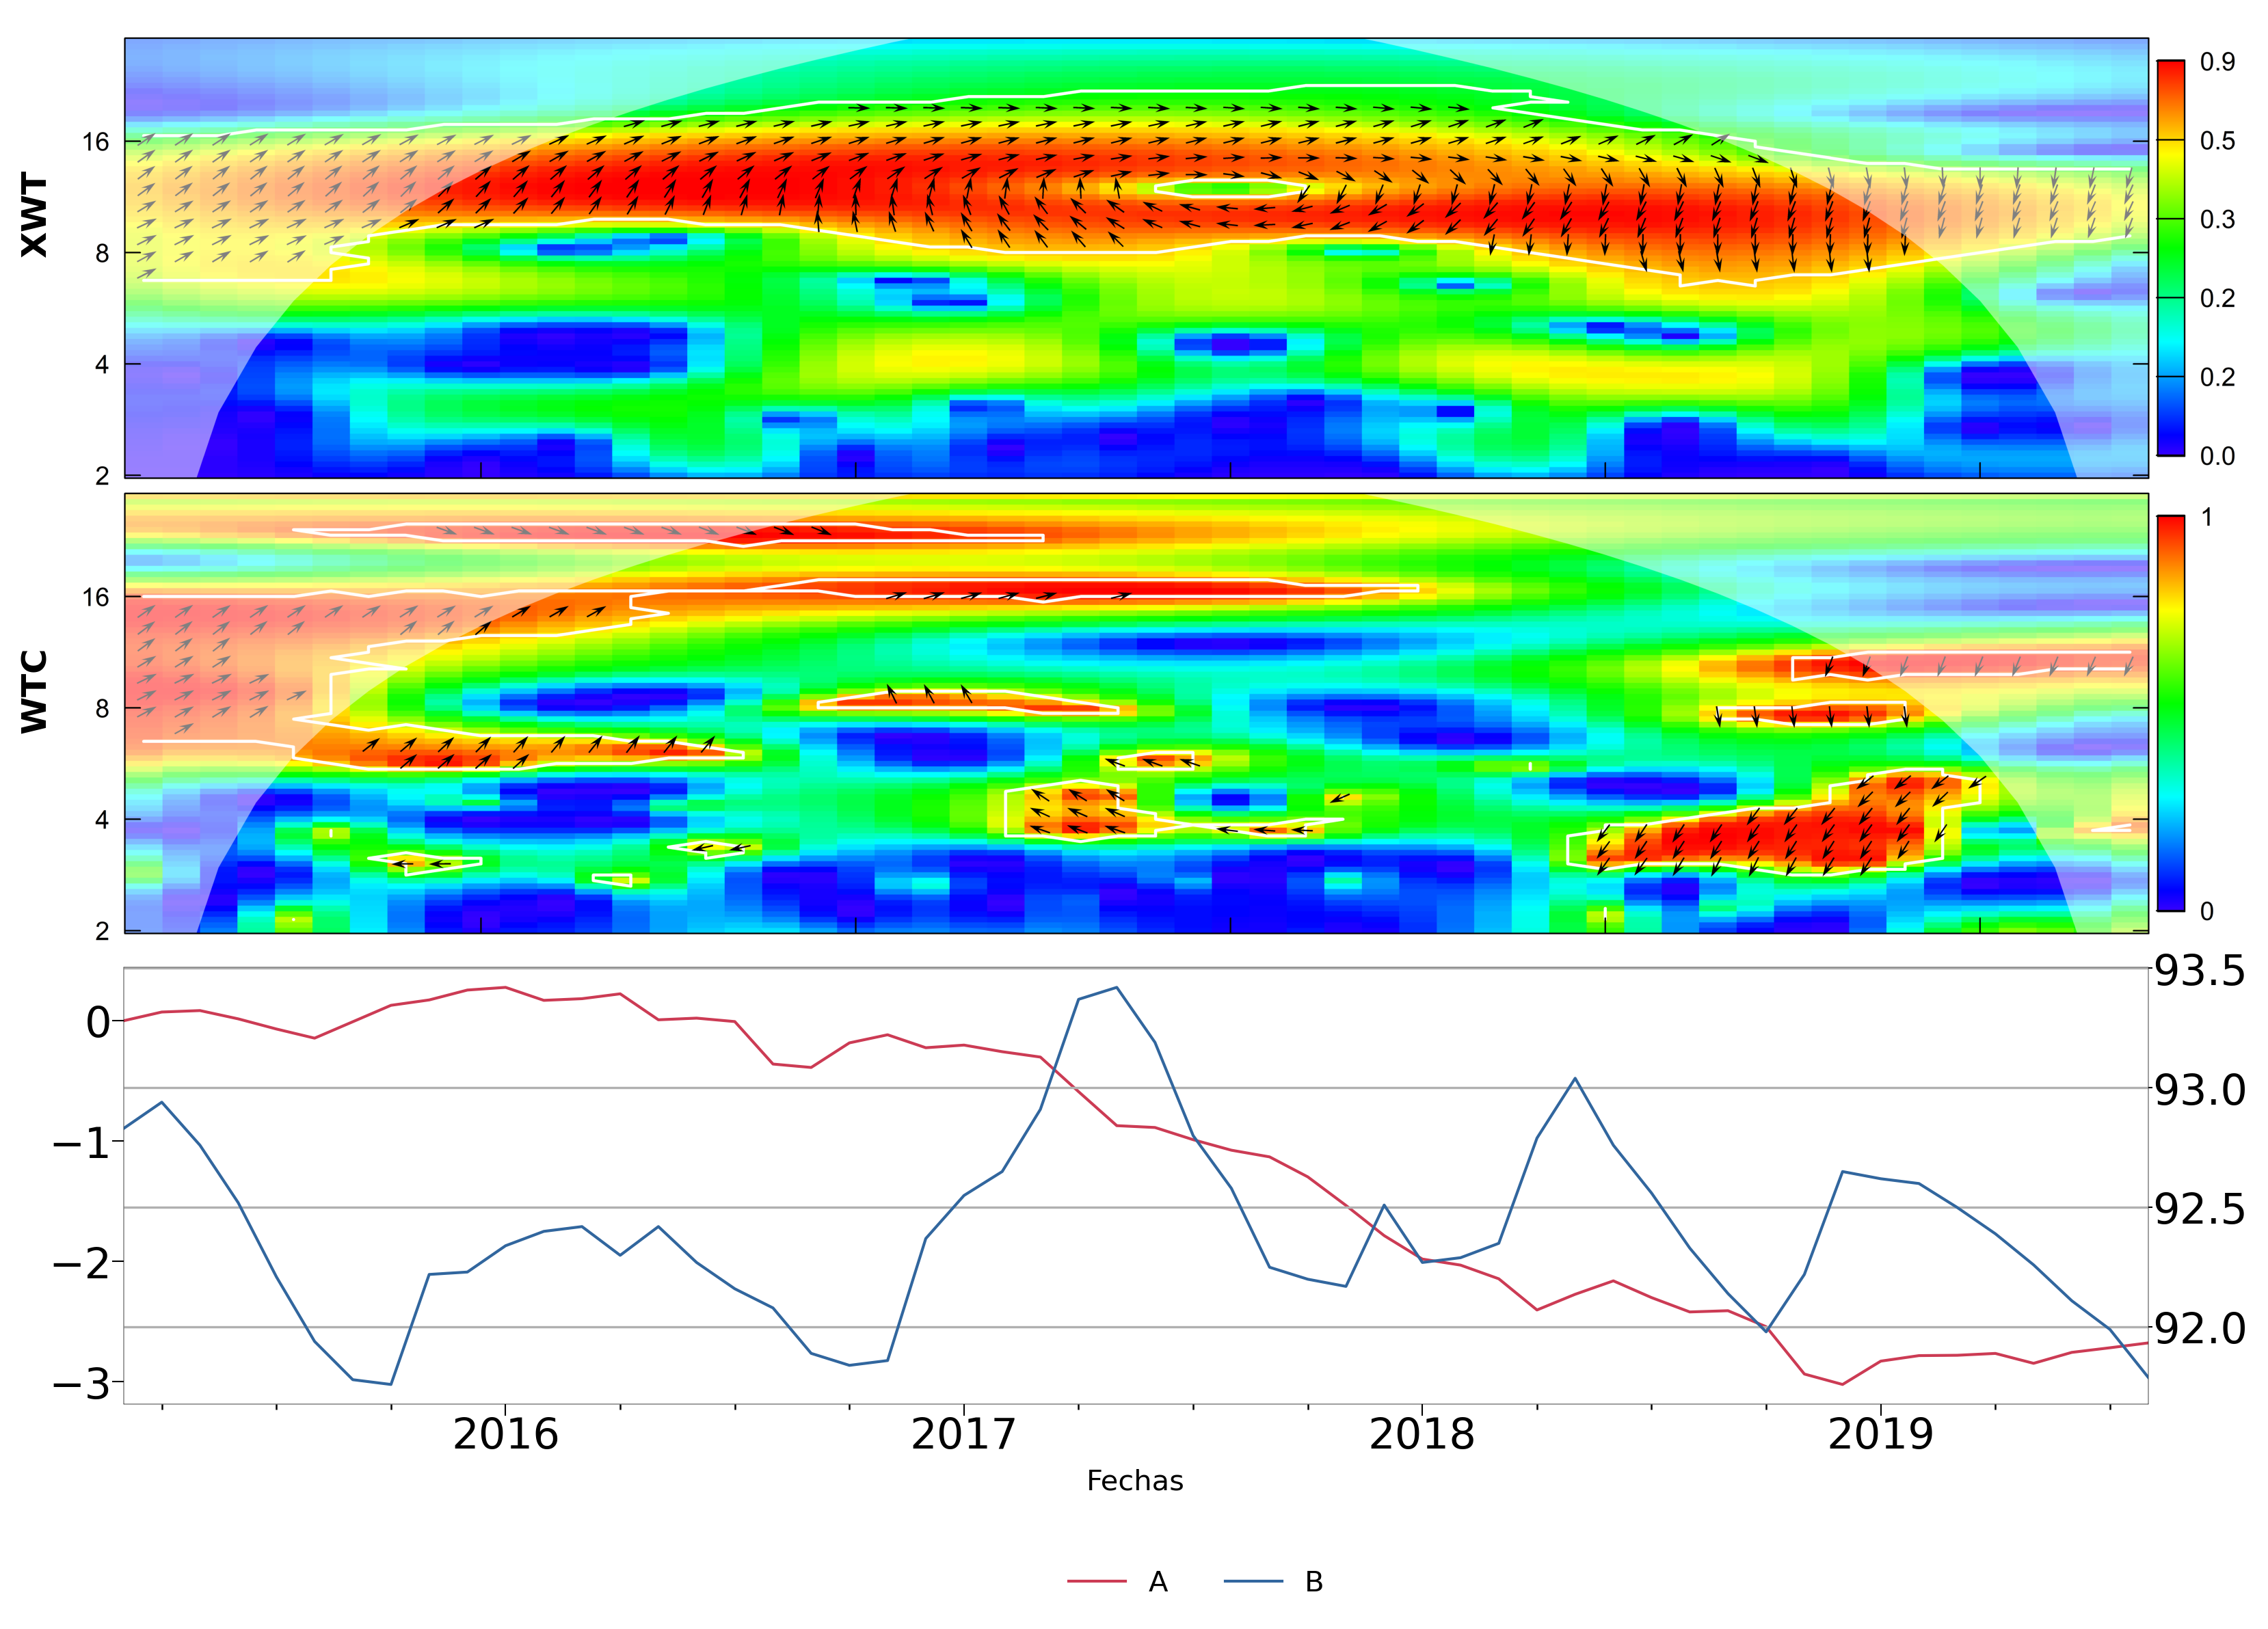

In [6]:
W = A2.wavelet('M','Asc','piezo', dt=1, dj=1/20, lowerPeriod=2, upperPeriod=30)

This analysis returns a `Wavelet` object, which contains three useful methods:

`W.image` Obtaining the resulting figures.

`W.used_params` Query the parameters of the analysis.

`W.legend` Query the legend for the XWT-WTC analysis.


***************************************************************************************************************************
---------------------------------------------------------------------------------------------------------------------------
***************************************************************************************************************************

Finally, it is also possible to **analyze several aggregates together** if they are entered as `*args` in the `Doñana.aggregate` function. In this case the analysis area is the joint area of the aggregates entered.

In addition, if all the functionalities of the aggreate are desired to be **automatically executed** for a set of aggregates (saving the data generated from each aggregate in a folder), it can be done through the `porLotes` method of the Model.